Investigasi sampel data titanic berikut dengan cara :

Cek secara head, tail, sample, info lalu observasi apa yang bisa anda peroleh ?
Lakukan Statistical Summary dengan mengekstrak informasi yang didapat dari observasi anda ?
Cek apakah ada duplikat dan bagaimana handlenya ?
Cek apakah ada missing value, berapa persentasenya jika ada, dan bagaimana cara handlenya ?

In [1]:
import pandas as pd

df = pd.read_excel('titanic.xlsx')
data = df.copy()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [7]:
data.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [9]:
data.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [14]:
data.sample(5) #mengambil random sample dari data

,survived,name,sex,age
190,1,"Longley, Miss. Gretchen Fiske",female,21.0
34,0,"Borebank, Mr. John James",male,42.0
247,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0
68,1,"Chevre, Mr. Paul Romaine",male,45.0
433,1,"Harris, Mr. George",male,62.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [19]:
data.columns #melihat kolom apa saja yang ada pada excel

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [21]:
#kelompokan untuk data jenis kategori dan numerik
categoricals = ['name', 'sex']
numericals = ['survived', 'age']

In [23]:
#perintah ini untuk menunjukkan statistical summary dari data numerik
data[numericals].describe()

,survived,age
count,500.000000,451.000000
mean,0.540000,35.917775
std,0.498897,14.766454
min,0.000000,0.666700
25%,0.000000,24.000000
50%,1.000000,35.000000
75%,1.000000,47.000000
max,1.000000,80.000000


In [25]:
data[categoricals].describe()

,name,sex
count,500,500
unique,499,2
top,"Eustis, Miss. Elizabeth Mussey",male
freq,2,288


In [29]:
for col in categoricals:
    print(data[col].value_counts())

name
Eustis, Miss. Elizabeth Mussey                          2
Allen, Miss. Elisabeth Walton                           1
Angle, Mrs. William A (Florence "Mary" Agnes Hughes)    1
Becker, Miss. Ruth Elizabeth                            1
Becker, Miss. Marion Louise                             1
                                                       ..
Holverson, Mr. Alexander Oskar                          1
Hogeboom, Mrs. John C (Anna Andrews)                    1
Hippach, Mrs. Louis Albert (Ida Sophia Fischer)         1
Hippach, Miss. Jean Gertrude                            1
McCrae, Mr. Arthur Gordon                               1
Name: count, Length: 499, dtype: int64
sex
male      288
female    212
Name: count, dtype: int64


In [31]:
for col in numericals:
    print(data[col].value_counts())

survived
1    270
0    230
Name: count, dtype: int64
age
24.0    23
30.0    20
36.0    19
18.0    14
45.0    14
        ..
11.0     1
59.0     1
80.0     1
2.0      1
3.0      1
Name: count, Length: 73, dtype: int64


PEMBERSIHAN DATA

In [32]:
len(data)

500

In [34]:
len(data.drop_duplicates())

499

In [38]:
duplicates = data[data.duplicated(keep=False)]
duplicates

,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",female,54.0
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0


In [49]:
dup_count = duplicates.groupby(list(data.columns)).size().reset_index(name = "duplicates count")

sorted_duplicates = dup_count.sort_values(by = ['duplicates count'], ascending = False)

sorted_duplicates

,survived,name,sex,age,duplicates count
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [52]:
data = data.drop_duplicates()

len(data)

499

MISSING VALUE

In [60]:
#melihat jumlah value null untuk setiap kolom
data.isna().sum() #bisa juga gunakan data.isnull().sum()

survived     0
name         0
sex          0
age         49
dtype: int64

In [62]:
for column in data.columns:
    print(f"============{column}==========")
    print(data[column].value_counts())
    print()


============survived==========
survived
1    269
0    230
Name: count, dtype: int64

============name==========
name
Allen, Miss. Elisabeth Walton                      1
Angle, Mr. William A                               1
Becker, Miss. Ruth Elizabeth                       1
Becker, Miss. Marion Louise                        1
Becker, Master. Richard F                          1
                                                  ..
Hogeboom, Mrs. John C (Anna Andrews)               1
Hippach, Mrs. Louis Albert (Ida Sophia Fischer)    1
Hippach, Miss. Jean Gertrude                       1
Hipkins, Mr. William Edward                        1
McCrae, Mr. Arthur Gordon                          1
Name: count, Length: 499, dtype: int64

============sex==========
sex
male      288
female    211
Name: count, dtype: int64

============age==========
age
24.0    23
30.0    20
36.0    19
18.0    14
45.0    14
        ..
11.0     1
59.0     1
80.0     1
2.0      1
3.0      1
Name: count, Length: 73,

In [65]:
print(data['age'].dtype)
print(data['age'].median())

float64
35.0


In [80]:
for column in data.select_dtypes(include=['number']).columns:
    data[column] = data[column].fillna(data[column].median())

In [81]:
data.isna().sum()

survived    0
name        0
sex         0
age         0
dtype: int64

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       499 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


VISUALISASI

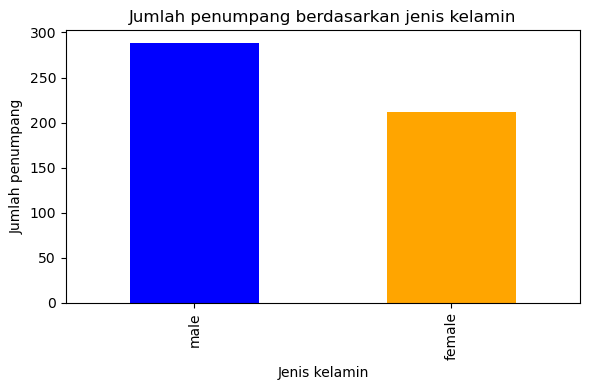

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
data['sex'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Jumlah penumpang berdasarkan jenis kelamin")
plt.xlabel("Jenis kelamin")
plt.ylabel("Jumlah penumpang")
plt.tight_layout()
plt.show()

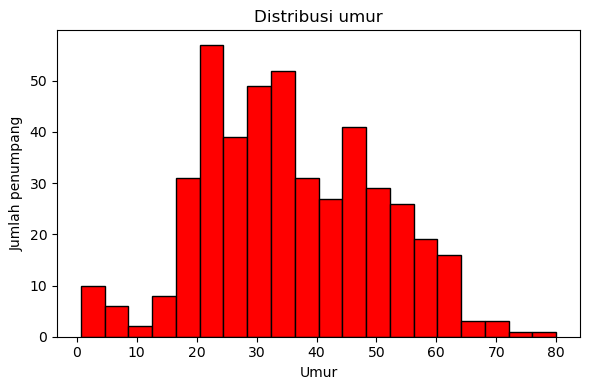

In [11]:
plt.figure(figsize=(6,4))
plt.hist(data['age'], bins = 20, color='red', edgecolor='black')
plt.title("Distribusi umur")
plt.xlabel("Umur")
plt.ylabel("Jumlah penumpang")
plt.tight_layout()
plt.show()


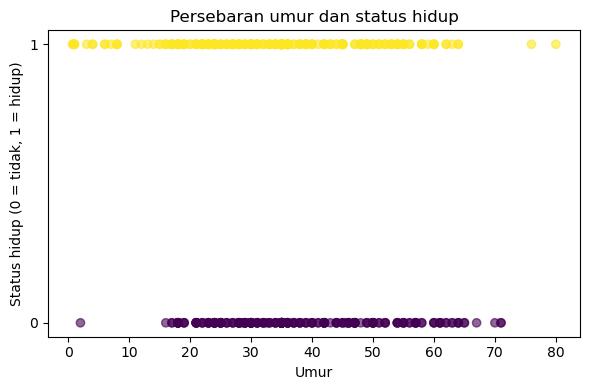

In [114]:
plt.figure(figsize=(6,4))
plt.scatter(data['age'], data['survived'], alpha= 0.6, c=data['survived'])
plt.title("Persebaran umur dan status hidup")
plt.xlabel("Umur")
plt.ylabel("Status hidup (0 = tidak, 1 = hidup)")
plt.yticks([0,1])
plt.tight_layout()
plt.show()


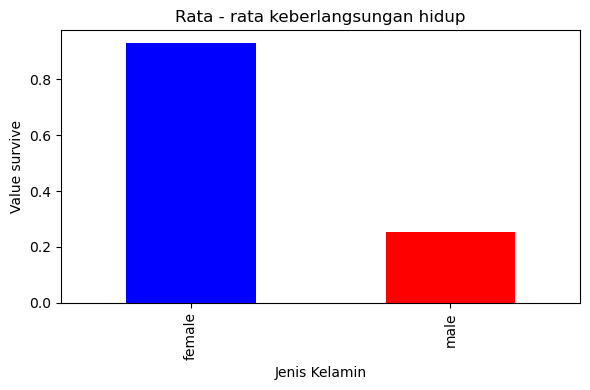

In [109]:
plt.figure(figsize=(6,4))
data.groupby('sex')['survived'].mean().plot(kind='bar', color=['blue', 'red'])
plt.title("Rata - rata keberlangsungan hidup")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Value survive")
plt.tight_layout()
plt.show()

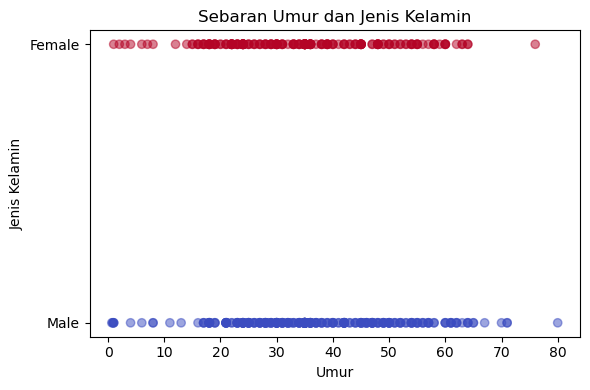

In [119]:
data['sex_num'] = data['sex'].map({'male': 0, 'female': 1})

plt.figure(figsize=(6,4))
plt.scatter(data['age'], data['sex_num'], alpha=0.5, c=data['sex_num'], cmap='coolwarm')
plt.yticks([0, 1], ['Male', 'Female'])
plt.title("Sebaran Umur dan Jenis Kelamin")
plt.xlabel("Umur")
plt.ylabel("Jenis Kelamin")
plt.tight_layout()
plt.show()
